# Vu 2024 demo



This tutorial demonstrates how to access an NWB file from the Vu 2024 dataset using `pynwb`.

This dataset contains fiber photometry recordings from multi-fiber arrays implanted in the striatum of head-fixed mice running on a treadmill.

Contents:

- [Read an NWB file](#read-nwb)
- [Access Subject metadata](#access-subject)
- [Access Imaging data](#access-imaging)
- [Access raw fiber photometry data](#access-fiber-photometry)
- [Access processed fiber photometry data](#access-processed-fiber-photometry)
- [Access motion corrected imaging data](#access-motion-corrected)
- [Access behavior](#access-behavior)


# Reading an NWB file <a name="read-nwb"></a>

This section demonstrates how to read an NWB file using `pynwb`.

An [NWBFile](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.NWBFile) represents a single session of an experiment. Each NWBFile must have a `session description`, `identifier`, and `session start time`.


In [265]:
from pynwb import NWBHDF5IO

nwbfile_path = "/Volumes/t7-ssd/Howe/nwbfiles/ROIs_GridDL-18_211110.nwb"

io = NWBHDF5IO(nwbfile_path, "r")
nwbfile = io.read()

# Access subject metadata <a name="access-subject"></a>

This section demonstrates how to access the [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field in an NWBFile.

The [Subject](https://pynwb.readthedocs.io/en/stable/pynwb.file.html#pynwb.file.Subject) field can be accessed as `nwbfile.subject`.

In [3]:
nwbfile.subject

# Access imaging <a name="access-imaging"></a>

This section demonstrates how to access the imaging data in the NWBFile.

`NWB` organizes data into different groups depending on the type of data. Groups can be thought of as folders within the file. Here are some of the groups within an NWBFile and the types of data they are intended to store:

- `acquisition`: raw, acquired data that should never change
- `processing`: processed data, typically the results of preprocessing algorithms and could change

## Fiber array imaging

The two-photon imaging was acquired using HCImage Live (Hamamatsu) at 30 Hz. It is stored in a [pynwb.ophys.TwoPhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.TwoPhotonSeries) object which is added to `nwbfile.acquisition`.


In [190]:
two_photon_series = nwbfile.acquisition["TwoPhotonSeries"]
two_photon_series

TwoPhotonSeries pynwb.ophys.TwoPhotonSeries at 0x13973916624
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (100, 376, 375), type "<u2">
  description: Two-photon imaging acquired at 30 Hz with Hamamatsu microscope.
  dimension: <HDF5 dataset "dimension": shape (2,), type "<i8">
  imaging_plane: ImagingPlane pynwb.ophys.ImagingPlane at 0x13975706832
Fields:
  conversion: 1.0
  description: Imaging plane for the two-photon microscope.
  device: HamamatsuMicroscope pynwb.device.Device at 0x13973430288
Fields:
  manufacturer: Hamamatsu Photonics

  excitation_lambda: nan
  grid_spacing_unit: meters
  indicator: unknown
  location: unknown
  optical_channel: (
    OpticalChannel <class 'pynwb.ophys.OpticalChannel'>
  )
  origin_coords_unit: meters
  unit: meters

  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (100,), type "<f8">
  timestamps_unit: seconds
  unit: n.a.

The information about the imaging plane can accessed as `nwbfile.acquisition["TwoPhotonSeries"].imaging_plane` or `nwbfile.imaging_planes["ImagingPlane"]`.

In [191]:
nwbfile.imaging_planes["ImagingPlane"]

ImagingPlane pynwb.ophys.ImagingPlane at 0x13975706832
Fields:
  conversion: 1.0
  description: Imaging plane for the two-photon microscope.
  device: HamamatsuMicroscope pynwb.device.Device at 0x13973430288
Fields:
  manufacturer: Hamamatsu Photonics

  excitation_lambda: nan
  grid_spacing_unit: meters
  indicator: unknown
  location: unknown
  optical_channel: (
    OpticalChannel <class 'pynwb.ophys.OpticalChannel'>
  )
  origin_coords_unit: meters
  unit: meters

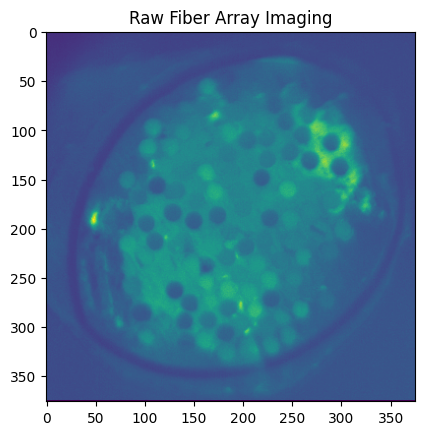

In [218]:
# Visualize the imaging data.

from matplotlib import pyplot as plt

frame = two_photon_series.data[50]
plt.imshow(frame)
plt.title("Raw Fiber Array Imaging")
plt.show()

# Fiber photometry traces

The raw fluorescence traces from the multi-fiber array are added to `nwbfile.acquisition` and are stored in a `FiberPhotometryResponseSeries` object using [`ndx-fiber-photometry`](https://github.com/catalystneuro/ndx-fiber-photometry). The fluorescence data during 470 nm excitation can be accessed as `nwbfile.acquisition["FiberPhotometryResponseSeries"]`.

In [105]:
fiber_photometry_response_series = nwbfile.acquisition["FiberPhotometryResponseSeries"]
fiber_photometry_response_series

FiberPhotometryResponseSeries abc.FiberPhotometryResponseSeries at 0x13928735312
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (6000, 103), type "<f8">
  description: Raw fluorescence traces acquired with multi-fiber array implanted in the striatum.
  fiber_photometry_table_region: fiber_photometry_table_region <class 'hdmf.common.table.DynamicTableRegion'>
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (6000,), type "<f8">
  timestamps_unit: seconds
  unit: n.a.

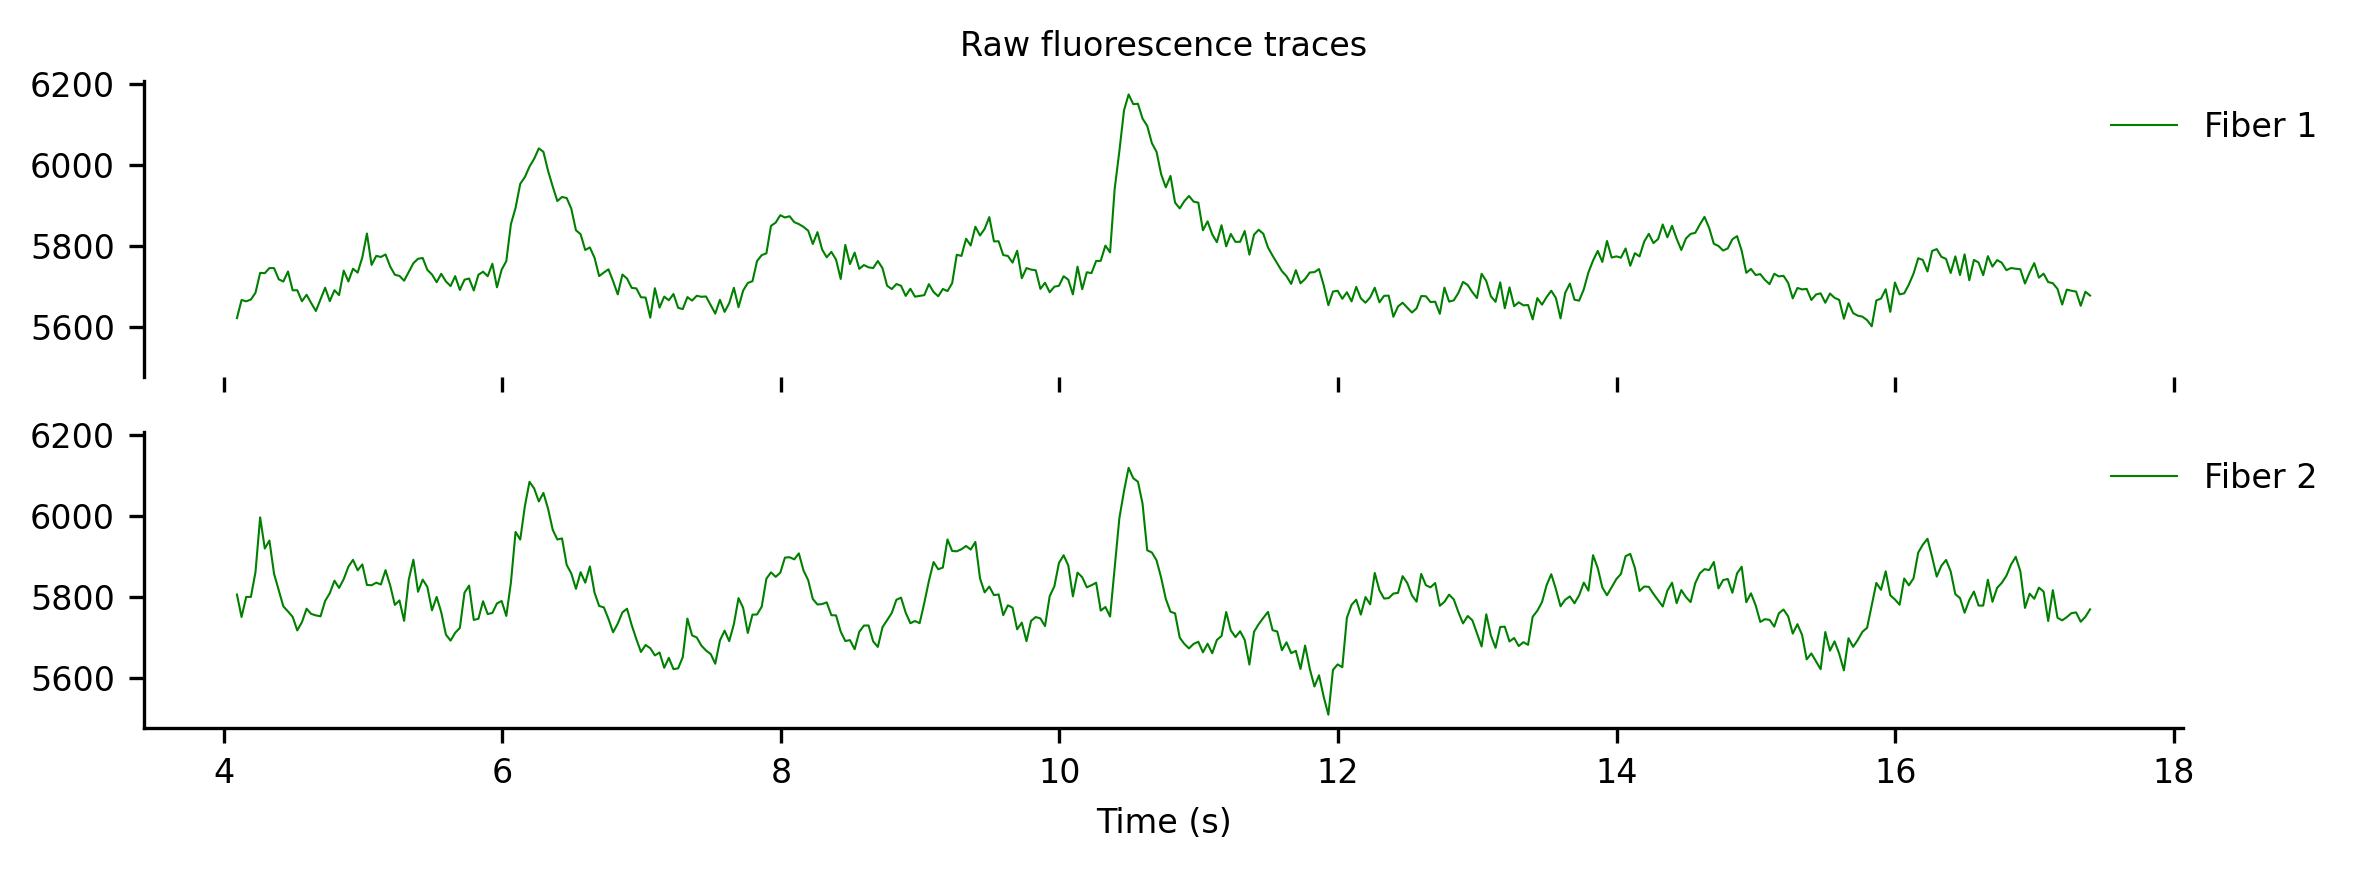

In [196]:
import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
fiber_indices = [0, 4]
data = fiber_photometry_response_series.data[100:500, fiber_indices]
timestamps = fiber_photometry_response_series.get_timestamps()[100:500]

fig, axes = plt.subplots(nrows=data.shape[1], ncols=1, figsize=(8, 3), sharey=True, sharex=True, dpi=300)

for i, ax in enumerate(axes):
    ax.plot(timestamps, data[:, i], linewidth=0.5, color="green")

    ax.tick_params(axis='y', labelsize=8)
    ax.tick_params(axis='x', labelsize=8)

    ax.legend([f"Fiber {i+1}"], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 8})

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

axes[0].spines['bottom'].set_visible(False)
axes[0].set_title("Raw fluorescence traces", fontsize=8)
plt.xlabel('Time (s)', fontsize=8)
plt.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()


## Fiber photometry metadata

The fiber photometry metadata includes the type of indicator(s), optical fiber(s), excitation source(s), photodector(s), dichroic mirror(s), and optical filter(s) that were used to construct a single fluorescence signal.

The metadata is stored in a `FiberPhotometryTable` object using [`ndx-fiber-photometry`](https://github.com/catalystneuro/ndx-fiber-photometry) and is added to `nwbfile.lab_meta_data`. It can be accessed as `nwbfile.lab_meta_data["FiberPhotometry"].fiber_photometry_table`.

In [106]:
nwbfile.lab_meta_data["FiberPhotometry"].fiber_photometry_table[:]

location  \
id                                               
0                                 Caudoputamen   
1                                 Caudoputamen   
2                  Primary motor area Layer 6a   
3                                 Caudoputamen   
4                  Primary motor area Layer 6a   
..                                         ...   
98                                Caudoputamen   
99                                Caudoputamen   
100                               Caudoputamen   
101  Primary somatosensory area mouth layer 6a   
102               Primary motor area Layer 2/3   

                                             indicator  \
id                                                       
0    dLight1.3b abc.Indicator at 0x13930416784\nFie...   
1    dLight1.3b abc.Indicator at 0x13930416784\nFie...   
2    dLight1.3b abc.Indicator at 0x13930416784\nFie...   
3    dLight1.3b abc.Indicator at 0x13930416784\nFie...   
4    dLight1.3b abc.Indicator at 0x13930416784\nFie...   
..                                                 ...   
98   dLight1.3b abc.Indicator at 0x13930416784\nFie...   
99   dLight1.3b abc.Indicator at 0x13930416784\nFie...   
100  dLight1.3b abc.Indicator at 0x13930416784\nFie...   
101  dLight1.3b abc.Indicator at 0x13930416784\nFie...   
102  dLight1.3b abc.Indicator at 0x13930416784\nFie...   

                                         optical_fiber  \
id                                                       
0    FiberArray abc.OpticalFiber at 0x5627423760\nF...   
1    FiberArray abc.OpticalFiber at 0x5627423760\nF...   
2    FiberArray abc.OpticalFiber at 0x5627423760\nF...   
3    FiberArray abc.OpticalFiber at 0x5627423760\nF...   
4    FiberArray abc.OpticalFiber at 0x5627423760\nF...   
..                                                 ...   
98   FiberArray abc.OpticalFiber at 0x5627423760\nF...   
99   FiberArray abc.OpticalFiber at 0x5627423760\nF...   
100  FiberArray abc.OpticalFiber at 0x5627423760\nF...   
101  FiberArray abc.OpticalFiber at 0x5627423760\nF...   
102  FiberArray abc.OpticalFiber at 0x5627423760\nF...   

                                     excitation_source  \
id                                                       
0    ExcitationSource470 abc.ExcitationSource at 0x...   
1    ExcitationSource470 abc.ExcitationSource at 0x...   
2    ExcitationSource470 abc.ExcitationSource at 0x...   
3    ExcitationSource470 abc.ExcitationSource at 0x...   
4    ExcitationSource470 abc.ExcitationSource at 0x...   
..                                                 ...   
98   ExcitationSource470 abc.ExcitationSource at 0x...   
99   ExcitationSource470 abc.ExcitationSource at 0x...   
100  ExcitationSource470 abc.ExcitationSource at 0x...   
101  ExcitationSource470 abc.ExcitationSource at 0x...   
102  ExcitationSource470 abc.ExcitationSource at 0x...   

                                         photodetector  \
id                                                       
0    CMOSCamera abc.Photodetector at 0x5625069328\n...   
1    CMOSCamera abc.Photodetector at 0x5625069328\n...   
2    CMOSCamera abc.Photodetector at 0x5625069328\n...   
3    CMOSCamera abc.Photodetector at 0x5625069328\n...   
4    CMOSCamera abc.Photodetector at 0x5625069328\n...   
..                                                 ...   
98   CMOSCamera abc.Photodetector at 0x5625069328\n...   
99   CMOSCamera abc.Photodetector at 0x5625069328\n...   
100  CMOSCamera abc.Photodetector at 0x5625069328\n...   
101  CMOSCamera abc.Photodetector at 0x5625069328\n...   
102  CMOSCamera abc.Photodetector at 0x5625069328\n...   

                                       dichroic_mirror  \
id                                                       
0    DichroicMirror1 abc.DichroicMirror at 0x139289...   
1    DichroicMirror1 abc.DichroicMirror at 0x139289...   
2    DichroicMirror1 abc.DichroicMirror at 0x139289...   
3    DichroicMirror1 abc.DichroicMirror at 0x139289...   
4    DichroicMirror

The `fiber_photometry_table_region` attribute in the `FiberPhotometryResponseSeries` object references row(s) of this table:

In [311]:
fiber_photometry_table_region = nwbfile.acquisition["FiberPhotometryResponseSeries"].fiber_photometry_table_region[:]
fiber_photometry_table_region.head()

location  \
id                                
0                  Caudoputamen   
1                  Caudoputamen   
2   Primary motor area Layer 6a   
3                  Caudoputamen   
4   Primary motor area Layer 6a   

                                            indicator  \
id                                                      
0   dLight1.3b abc.Indicator at 0x13948034640\nFie...   
1   dLight1.3b abc.Indicator at 0x13948034640\nFie...   
2   dLight1.3b abc.Indicator at 0x13948034640\nFie...   
3   dLight1.3b abc.Indicator at 0x13948034640\nFie...   
4   dLight1.3b abc.Indicator at 0x13948034640\nFie...   

                                        optical_fiber  \
id                                                      
0   FiberArray abc.OpticalFiber at 0x13929973712\n...   
1   FiberArray abc.OpticalFiber at 0x13929973712\n...   
2   FiberArray abc.OpticalFiber at 0x13929973712\n...   
3   FiberArray abc.OpticalFiber at 0x13929973712\n...   
4   FiberArray abc.OpticalFiber at 0x13929973712\n...   

                                    excitation_source  \
id                                                      
0   ExcitationSource470 abc.ExcitationSource at 0x...   
1   ExcitationSource470 abc.ExcitationSource at 0x...   
2   ExcitationSource470 abc.ExcitationSource at 0x...   
3   ExcitationSource470 abc.ExcitationSource at 0x...   
4   ExcitationSource470 abc.ExcitationSource at 0x...   

                                        photodetector  \
id                                                      
0   CMOSCamera abc.Photodetector at 0x13958077328\...   
1   CMOSCamera abc.Photodetector at 0x13958077328\...   
2   CMOSCamera abc.Photodetector at 0x13958077328\...   
3   CMOSCamera abc.Photodetector at 0x13958077328\...   
4   CMOSCamera abc.Photodetector at 0x13958077328\...   

                                      dichroic_mirror allen_atlas_coordinates  \
id                                                                              
0   DichroicMirror1 abc.DichroicMirror at 0x139034...         [442, 644, 229]   
1   DichroicMirror1 abc.DichroicMirror at 0x139034...         [454, 642, 304]   
2   DichroicMirror1 abc.DichroicMirror at 0x139034...         [460, 674, 180]   
3   DichroicMirror1 abc.DichroicMirror at 0x139034...         [495, 685, 260]   
4   DichroicMirror1 abc.DichroicMirror at 0x139034...         [400, 686, 160]   

    is_good_fiber         coordinates  \
id                                      
0            True  [0.83, 0.74, 1.78]   
1            True  [0.71, 0.72, 2.44]   
2            True  [0.65, 1.04, 1.35]   
3            True   [0.3, 1.15, 2.05]   
4            True  [1.25, 1.16, 1.17]   

                                      emission_filter  \
id                                                      
0   OpticalFilter525 abc.BandOpticalFilter at 0x13...   
1   OpticalFilter525 abc.BandOpticalFilter at 0x13...   
2   OpticalFilter525 abc.BandOpticalFilter at 0x13...   
3   OpticalFilter525 abc.BandOpticalFilter at 0x13...   
4   OpticalFilter525 abc.BandOpticalFilter at 0x13...   

                                    excitation_filter  
id                                                     
0   OpticalFilter470 abc.BandOpticalFilter at 0x13...  
1   OpticalFilter470 abc.BandOpticalFilter at 0x13...  
2   OpticalFilter470 abc.BandOpticalFilter at 0x13...  
3   OpticalFilter470 abc.BandOpticalFilter at 0x13...  
4   OpticalFilter470 abc.BandOpticalFilter at 0x13...

The metadata on the optical fiber used to record the GCaMP fluorescence is added to `nwbfile.devices` and can be acessed as `nwbfile.devices["Fiber1"]` or can be accessed from the referenced optical fiber in the `fiber_photometry_table_region` of the `FiberPhotometryResponseSeries`.

In [108]:
fiber_photometry_table_region["optical_fiber"][0]

FiberArray abc.OpticalFiber at 0x5627423760
Fields:
  core_diameter_in_um: 34.0
  description: The optical fiber used in a multi-fiber arrays configuration, fabricated in-house to enable large scale measurements across deep brain volumes. Bare fibers were cut into pieces (ca. 3cm) then mounted under a microscope into 55-60μm diameter holes in a custom 3D printed grid (3mm W x 5mm L, Boston Micro Fabrication), measured under a dissection microscope to target a particular depth beneath the grid, and secured in place with UV glue (Norland Optical Adhesive 61). Each array contained between 30 and 103 fibers separated by a minimum of 220μm radially and 250μm axially. Separation was calculated to achieve maximal coverage of the striatum volume with no overlap in the collection fields of individual fibers. Fibers were cut with a fiber scribe, and the distal ends were inspected to ensure a uniform cut, and re-cut as necessary. Distal ends were then glued inside an 1cm ca. section of polyimide tube (0.8-1.3mm diameter, MicroLumen) then cut with a fresh razorblade. The bundled fibers inside the tube were then polished on fine grained polishing paper (ThorLabs,polished first with 6 μm, followed by 3 μm) to create a smooth, uniform fiber bundle surface for imaging. A larger diameter post was mounted on one side of the plastic grid to facilitate holding during implantation.
  manufacturer: Fiber Optics Tech
  model: not specified
  numerical_aperture: 0.66

In [109]:
fiber_photometry_table_region["indicator"][0]

dLight1.3b abc.Indicator at 0x13930416784
Fields:
  description: green dopamine sensor
  label: pAAV-CAG-dLight1.3b(AAV5)

In [110]:
fiber_photometry_table_region["excitation_source"][0]

ExcitationSource470 abc.ExcitationSource at 0x13930225552
Fields:
  description: Blue excitation light (470 nm LED, Thorlabs, No. SOLIS-470C) and violet excitation light (for the isosbestic control)
were coupled into the optic fiber such that a power of 0.75 mW was delivered to the fiber tip.
Then, 470 nm and 405 nm excitation were alternated at 100 Hz using a waveform generator,
each filtered with a corresponding filter.

  excitation_wavelength_in_nm: 470.0
  illumination_type: LED
  manufacturer: Thorlabs
  model: SOLIS-470C

In [111]:
fiber_photometry_table_region["photodetector"][0]

CMOSCamera abc.Photodetector at 0x5625069328
Fields:
  description: A tube lens in each path (Thor labs, No TTL165-A, detected wavelength bandwidth 350-700 nm) focused emission light onto the CMOS sensors of the cameras to form an image of the fiber bundle.
  detected_wavelength_in_nm: 525.0
  detector_type: CMOS sensor
  manufacturer: Hamamatsu Photonics
  model: Orca Fusion BT Gen III

In [112]:
fiber_photometry_table_region["dichroic_mirror"][0]

DichroicMirror1 abc.DichroicMirror at 0x13928936656
Fields:
  cut_on_wavelength_in_nm: 532.0
  description: The dichroic mirror used to reflect green and pass red fluorescence
  manufacturer: Chroma Tech Corp
  model: ZT532rdc
  reflection_band_in_nm: [405. 532.]
  transmission_band_in_nm: [545. 750.]

In [113]:
fiber_photometry_table_region["emission_filter"][0]

OpticalFilter525 abc.BandOpticalFilter at 0x5627420048
Fields:
  bandwidth_in_nm: 50.0
  center_wavelength_in_nm: 525.0
  description: The band-pass filter used to isolate the green emitted light after passing through a dichroic (Chroma, No. 532rdc) that reflected green and passed red fluorescence.
  filter_type: Bandpass
  manufacturer: Chroma
  model: 525/50m

In [114]:
fiber_photometry_table_region["excitation_filter"][0]

OpticalFilter470 abc.BandOpticalFilter at 0x5626173328
Fields:
  bandwidth_in_nm: 24.0
  center_wavelength_in_nm: 473.0
  description: The band-pass filter used to isolate the 470 nm excitation light.
  filter_type: Bandpass
  manufacturer: Chroma
  model: ET473/24

# Access processed fiber photometry data <a name="access-processed-fiber-photometry"></a>

This section demonstrates how to access the processed fiber photometry data in the NWBFile.

The processed fiber photometry data is stored in "processing/ophys" which can be accessed as `nwbfile.processing["ophys"]`. Within this processing module we can access the ∆F/F traces as `nwbfile.processing["ophys"]["DfOverFFiberPhotometryResponseSeries"]`.

In [198]:
nwbfile.processing["ophys"]

ophys pynwb.base.ProcessingModule at 0x13957360272
Fields:
  data_interfaces: {
    BaselineFiberPhotometryResponseSeries <class 'abc.FiberPhotometryResponseSeries'>,
    DfOverFFiberPhotometryResponseSeries <class 'abc.FiberPhotometryResponseSeries'>,
    ImageSegmentation <class 'pynwb.ophys.ImageSegmentation'>,
    TwoPhotonSeriesMotionCorrected <class 'pynwb.ophys.TwoPhotonSeries'>
  }
  description: No description.

In [137]:
df_over_f_traces = nwbfile.processing["ophys"]["DfOverFFiberPhotometryResponseSeries"]
df_over_f_traces

DfOverFFiberPhotometryResponseSeries abc.FiberPhotometryResponseSeries at 0x5634051536
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (6000, 103), type "<f8">
  description: Baseline corrected (DF/F) fluorescence traces acquired with multi-fiber array implanted in the striatum.
  fiber_photometry_table_region: fiber_photometry_table_region <class 'hdmf.common.table.DynamicTableRegion'>
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (6000,), type "<f8">
  timestamps_unit: seconds
  unit: n.a.

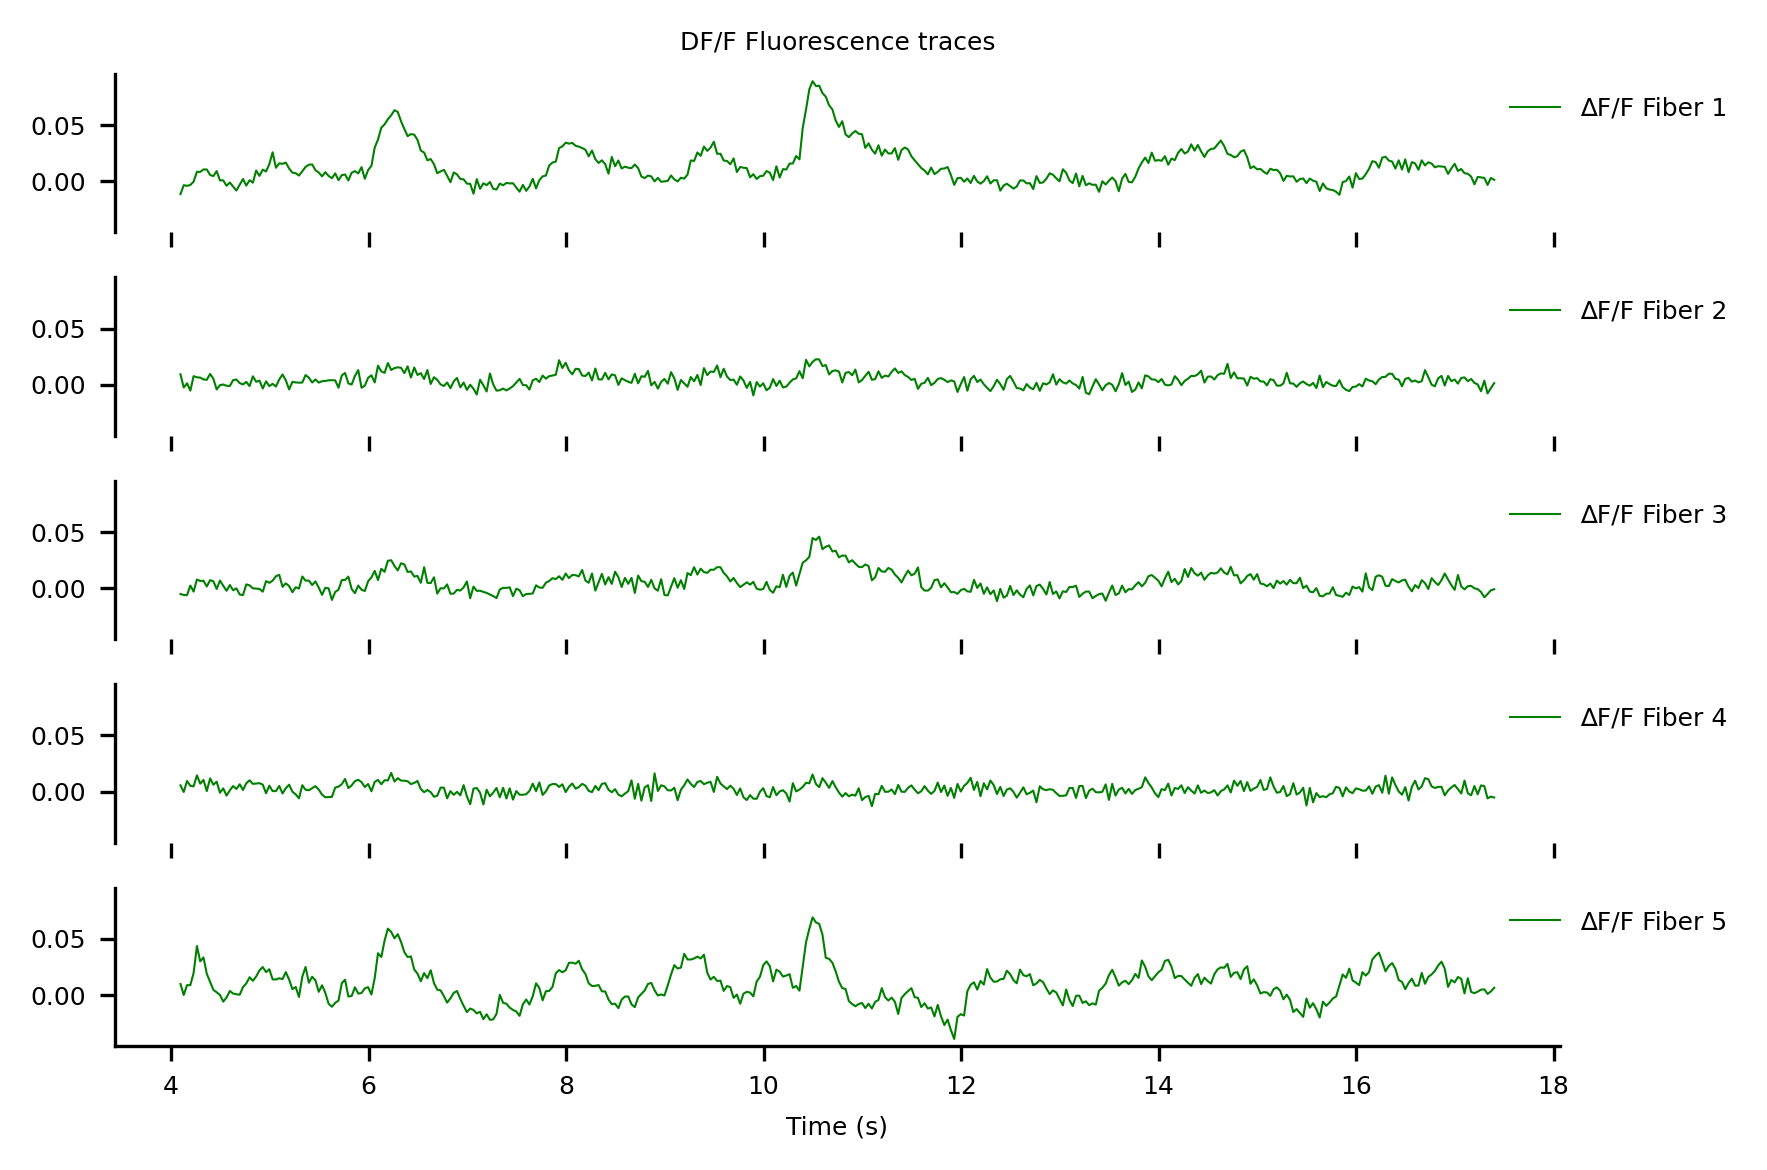

In [221]:
# Visualize the DF/F traces.

import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
data = df_over_f_traces.data[100:500, :5]
timestamps = df_over_f_traces.get_timestamps()[100:500]

fig, axes = plt.subplots(nrows=data.shape[1], ncols=1, figsize=(6, 4), sharey=True, sharex=True, dpi=300)

for i, ax in enumerate(axes):
    ax.plot(timestamps, data[:, i], linewidth=0.5, color="green")

    ax.tick_params(axis='y', labelsize=6)
    ax.tick_params(axis='x', labelsize=6)

    ax.legend([f"∆F/F Fiber {i+1}"], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 6})

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    if i != data.shape[1] - 1:
        ax.spines['bottom'].set_visible(False)

axes[0].set_title("DF/F Fluorescence traces", fontsize=6)
plt.xlabel('Time (s)', fontsize=6)
plt.tick_params(axis='x', labelsize=6)

plt.tight_layout()
plt.show()

# Access motion corrected imaging data <a name="access-motion-corrected"></a>

This section demonstrates how to access the motion corrected imaging data in the NWBFile.

Similarly to the raw imaging data, the processed imaging data is stored in a [pynwb.ophys.TwoPhotonSeries](https://pynwb.readthedocs.io/en/stable/pynwb.ophys.html#pynwb.ophys.TwoPhotonSeries) object and is added to `nwbfile.processing["ophys"]`.

In [199]:
motion_corrected = nwbfile.processing["ophys"]["TwoPhotonSeriesMotionCorrected"]
motion_corrected

TwoPhotonSeriesMotionCorrected pynwb.ophys.TwoPhotonSeries at 0x13923598992
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (100, 381, 378), type "<u2">
  description: The motion corrected two-photon imaging data.
  dimension: <HDF5 dataset "dimension": shape (2,), type "<i8">
  imaging_plane: ImagingPlane pynwb.ophys.ImagingPlane at 0x13975706832
Fields:
  conversion: 1.0
  description: Imaging plane for the two-photon microscope.
  device: HamamatsuMicroscope pynwb.device.Device at 0x13973430288
Fields:
  manufacturer: Hamamatsu Photonics

  excitation_lambda: nan
  grid_spacing_unit: meters
  indicator: unknown
  location: unknown
  optical_channel: (
    OpticalChannel <class 'pynwb.ophys.OpticalChannel'>
  )
  origin_coords_unit: meters
  unit: meters

  offset: 0.0
  rate: 29.994900866852635
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: n.a.

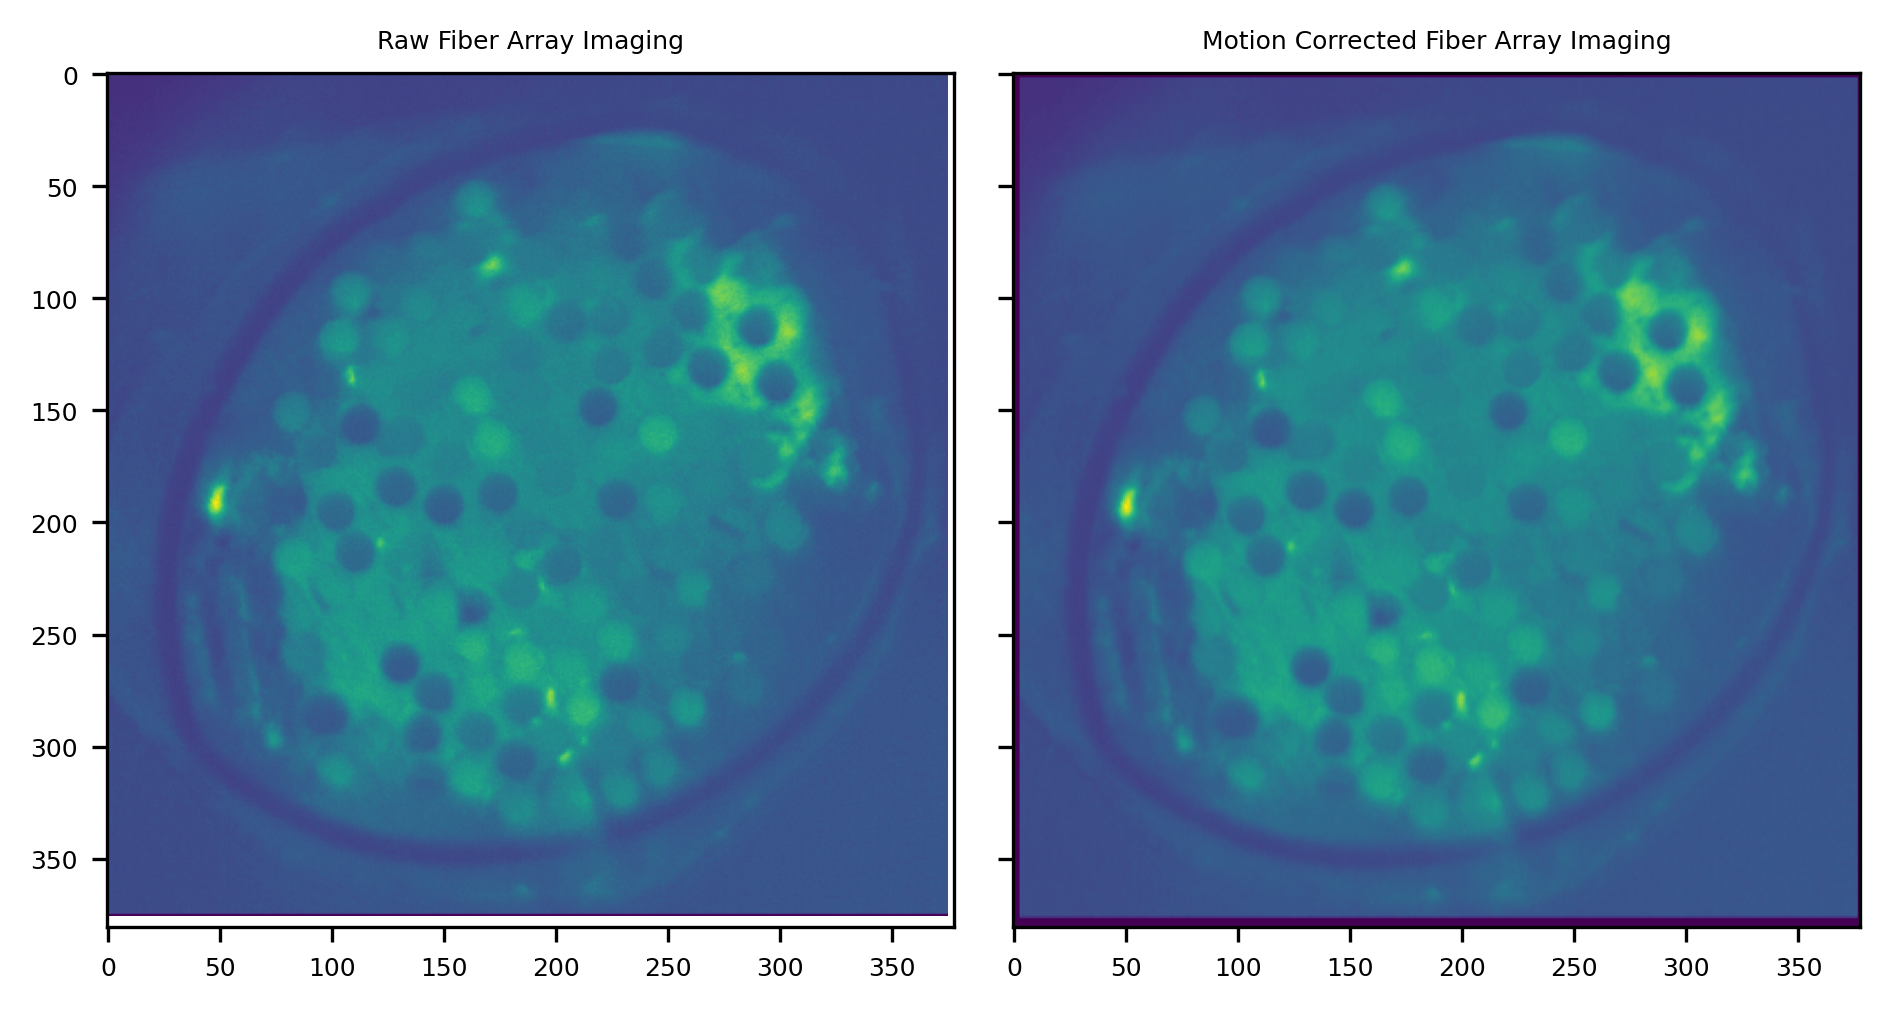

In [211]:
# Visualize the motion corrected imaging data.

from matplotlib import pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, dpi=300)

axes[0].imshow(two_photon_series.data[50])
axes[0].set_title("Raw Fiber Array Imaging", fontsize=6)
axes[0].tick_params(axis='x', labelsize=6)
axes[0].tick_params(axis='y', labelsize=6)

axes[1].imshow(motion_corrected.data[50])
axes[1].set_title("Motion Corrected Fiber Array Imaging", fontsize=6)
axes[1].tick_params(axis='x', labelsize=6)
axes[1].tick_params(axis='y', labelsize=6)

plt.tight_layout()
plt.show()

## Access ROIs <a name="access-motion-corrected"></a>

This section demonstrates how to access the ROIs corresponding to fiber tops in the NWBFile.

The centroids and image masks of the ROIs are stored in a `PlaneSegmentation` added to an `ImageSegmentation` object in `nwbfile.processing["ophys"]`.


In [177]:
rois_table = nwbfile.processing["ophys"]["ImageSegmentation"]["PlaneSegmentation"][:]
rois_table.head()

image_mask ROICentroids  Accepted  \
id                                                                             
0   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...    [58, 165]         1   
1   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...    [79, 162]         1   
2   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...    [82, 143]         1   
3   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...    [85, 122]         1   
4   [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...    [99, 110]         1   

    Rejected  
id            
0          0  
1          0  
2          0  
3          0  
4          0

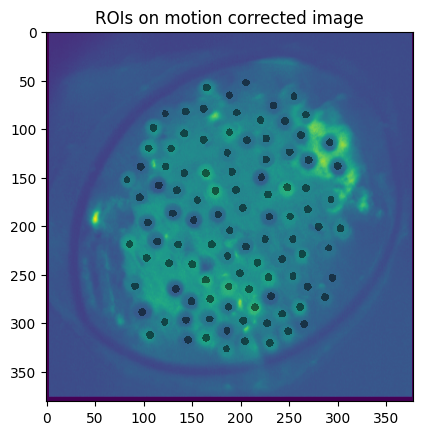

In [261]:
# Visualize the ROIs and the motion corrected imaging data.
from matplotlib import pyplot as plt

plt.imshow(motion_corrected.data[50])

roi_masks = rois_table["image_mask"].values
roi_masks_combined = np.zeros(roi_masks[0].shape)
for i in range(roi_masks.shape[0]):
    inds = np.where(roi_masks[i] != 0)
    roi_masks_combined[inds] = 1

masked_roi_masks_combined = np.ma.masked_where(roi_masks_combined == 0, roi_masks_combined)
plt.imshow(masked_roi_masks_combined, cmap='gray', interpolation='none', alpha=0.5)
plt.title("ROIs on motion corrected image")
plt.show()

# Access behavior data <a name="access-behavior"></a>

This section demonstrates how to access the behavior data in the NWBFile.

The velocity for the roll and pitch (x, y) measured in m/s is added to `nwbfile.processing["behavior"]` stored in a [pynwb.base.TimeSeries](https://pynwb.readthedocs.io/en/stable/pynwb.base.html#pynwb.base.TimeSeries) object. It can be accessed as `nwbfile.processing["behavior"]["Velocity"]`. 

The angular velocity from yaw (rotational) velocity is converted to radians/s and is also stored in a [pynwb.base.TimeSeries](https://pynwb.readthedocs.io/en/stable/pynwb.base.html#pynwb.base.TimeSeries) object. 
It can be accessed as `nwbfile.processing["behavior"]["AngularVelocity"]`.

In [266]:
nwbfile.processing["behavior"]

behavior pynwb.base.ProcessingModule at 0x14069749904
Fields:
  data_interfaces: {
    CompassDirection <class 'pynwb.behavior.CompassDirection'>,
    TimeIntervals <class 'pynwb.epoch.TimeIntervals'>,
    Velocity <class 'pynwb.base.TimeSeries'>
  }
  description: Contains the velocity signals from two optical mouse sensors (Logitech G203 mice with hard plastic shells removed).

In [264]:
velocity = nwbfile.processing["behavior"]["Velocity"]
velocity

Velocity pynwb.base.TimeSeries at 0x13948091088
Fields:
  comments: no comments
  conversion: 1.0
  data: <HDF5 dataset "data": shape (6000, 2), type "<f8">
  description: Velocity for the roll and pitch (x, y) measured in m/s.
  interval: 1
  offset: 0.0
  resolution: -1.0
  timestamps: <HDF5 dataset "timestamps": shape (6000,), type "<f8">
  timestamps_unit: seconds
  unit: m/s

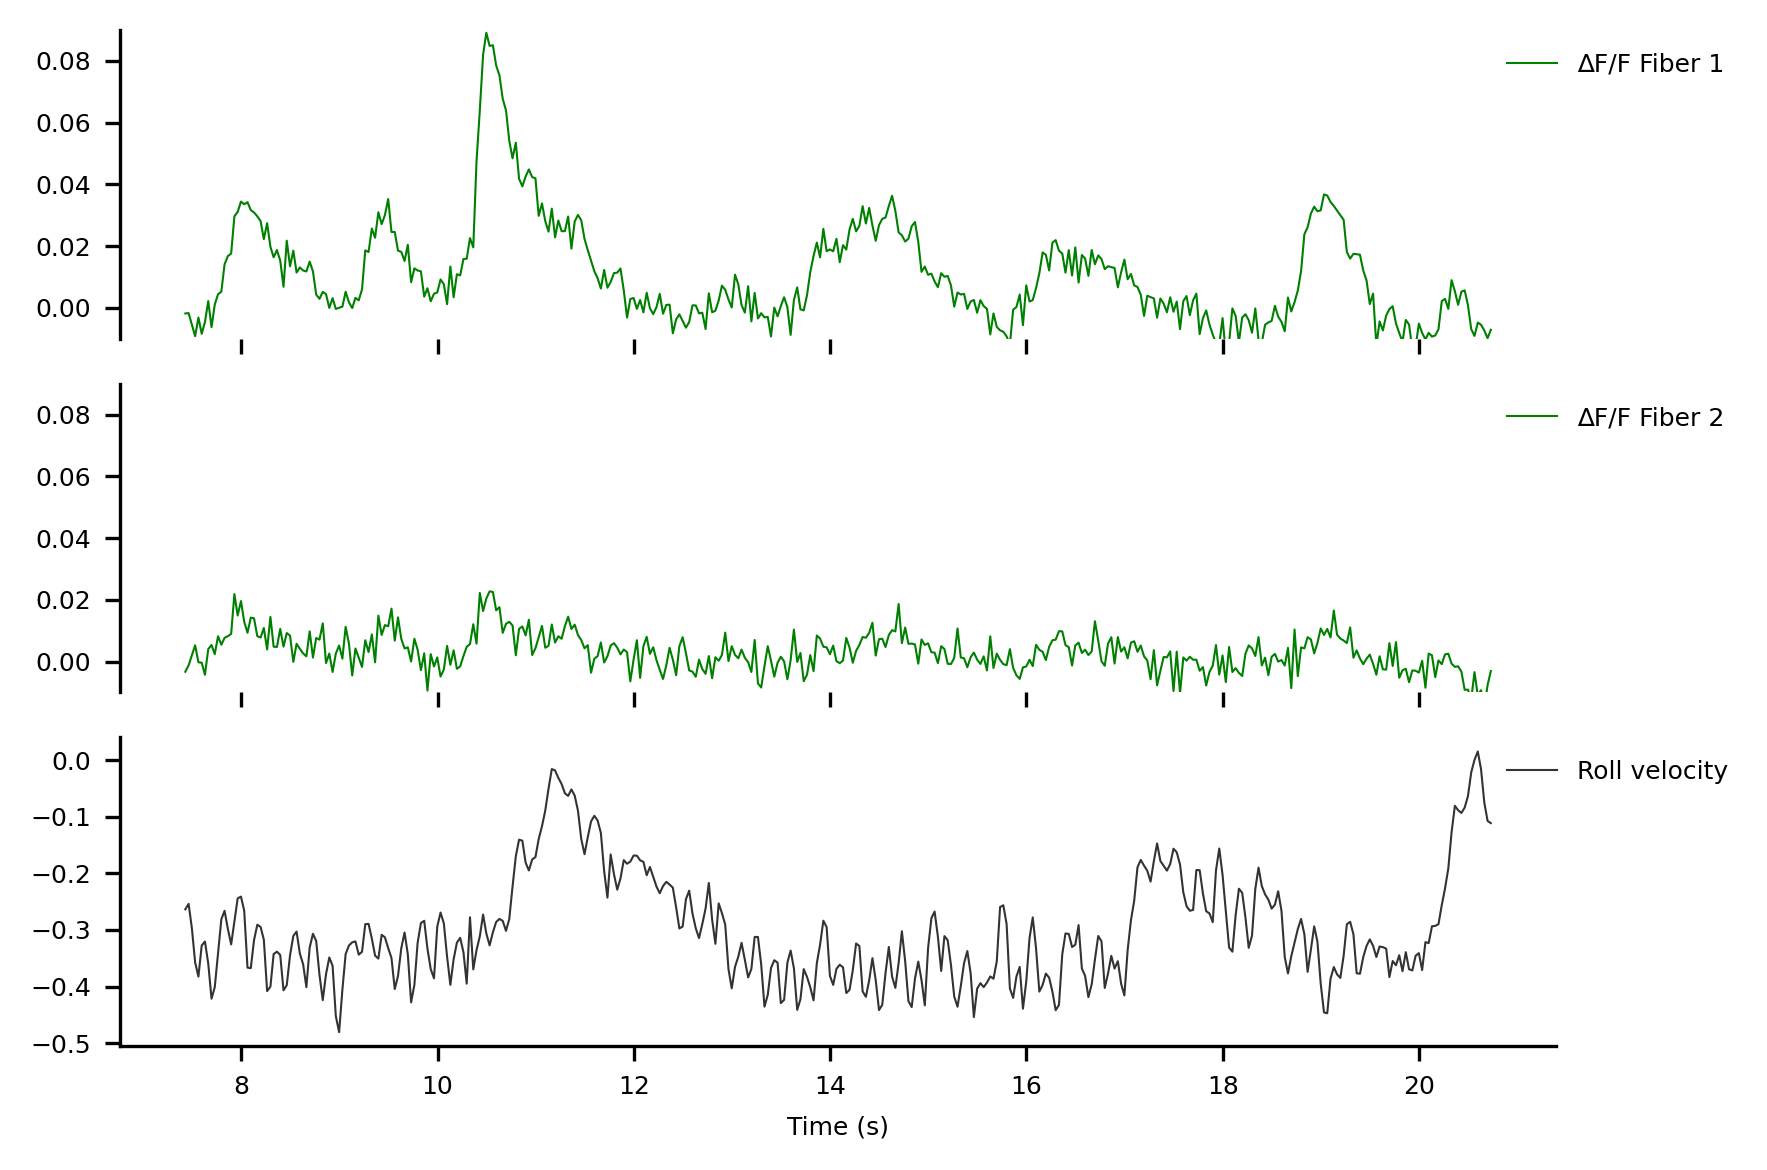

In [285]:
# Visualize the DF/F traces and velocity for the roll in m/s.

import pandas as pd
from matplotlib import pyplot as plt

# Prepare data for plotting
data = df_over_f_traces.data[200:600, :2]
timestamps = df_over_f_traces.get_timestamps()[200:600]

velocity_x = velocity.data[200:600, 0]

fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 4), sharey=False, sharex=True, dpi=300)

for i in range(len(axes)-1):
    axes[i].plot(timestamps, data[:, i], linewidth=0.5, color="green")
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    
    axes[i].tick_params(axis='y', labelsize=6)
    axes[i].tick_params(axis='x', labelsize=6)
    axes[i].spines['bottom'].set_visible(False)
    axes[i].set_ylim([-0.01, 0.09])

    axes[i].legend([f"∆F/F Fiber {i+1}"], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 6})

    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
            
axes[-1].plot(timestamps, velocity_x, color="black", alpha=0.8, linewidth=0.5)
axes[-1].spines['top'].set_visible(False)
axes[-1].spines['right'].set_visible(False)
axes[-1].legend(["Roll velocity"], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 6})
axes[-1].tick_params(axis='y', labelsize=6)
axes[-1].tick_params(axis='x', labelsize=6)

plt.xlabel('Time (s)', fontsize=6)
plt.tight_layout()
plt.show()

The onset times of the events (licking, tone, light or reward delivery) are added to `nwbfile.processing["behavior"]["TimeIntervals"]` table.

In [295]:
events = nwbfile.processing["behavior"]["TimeIntervals"][:]
events

start_time   stop_time event_type
id                                    
0      10.21300    11.04650      Light
1      25.31550    26.14900      Light
2      36.25050    37.55050       Tone
3      69.78875    70.62225      Light
4      87.65825    88.95850       Tone
..          ...         ...        ...
158  1312.37725  1312.51050       Lick
159  1313.64425  1313.71100       Lick
160  1318.24500  1319.04500      Light
161  1325.11250  1326.37950       Tone
162  1330.61350  1331.44700      Light

[163 rows x 3 columns]

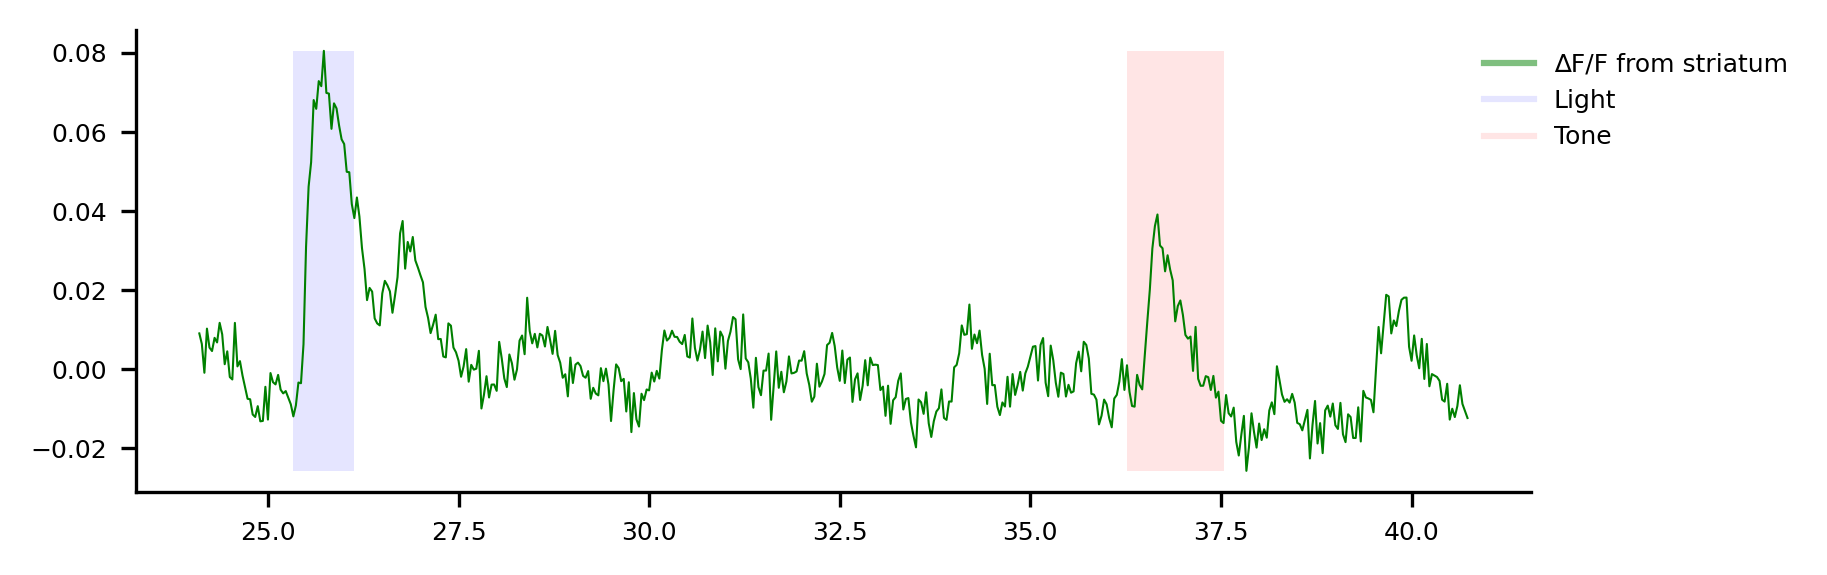

In [310]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

# Prepare data for plotting
data = df_over_f_traces.data[700:1200, 0]
timestamps = df_over_f_traces.get_timestamps()[700:1200]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 2), dpi=300, sharex=True)

light_events = events[events["event_type"] == "Light"]
light_events = light_events[(light_events["start_time"] >= timestamps[0]) & (light_events["stop_time"] < timestamps[-1])]

tone_events = events[events["event_type"] == "Tone"]
tone_events = tone_events[(tone_events["start_time"] >= timestamps[0]) & (tone_events["stop_time"] < timestamps[-1])]

ax.plot(timestamps, data, color="green", linewidth=0.5)

for ind, row in light_events.iterrows():
    ax.fill_between(timestamps, min(data), max(data), where=(timestamps >= row["start_time"]) & (timestamps <= row["stop_time"]), color='blue', edgecolor='none', alpha=0.1)

for ind, row in tone_events.iterrows():
    ax.fill_between(timestamps, min(data), max(data), where=(timestamps >= row["start_time"]) & (timestamps <= row["stop_time"]), color='red', edgecolor='none', alpha=0.1)

# Create proxy lines for legend entries with corresponding colors and transparency
green_line = mlines.Line2D([], [], color='green', label='∆F/F from striatum', alpha=0.5)
blue_line = mlines.Line2D([], [], color='blue', label='Light', alpha=0.1)
red_line = mlines.Line2D([], [], color='red', label='Tone', alpha=0.1)

# Set legends with proxy lines
ax.legend(handles=[green_line, blue_line, red_line], frameon=False, bbox_to_anchor=(.95, 1), loc='upper left', prop={'size': 6})

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis='y', labelsize=6)
ax.tick_params(axis='x', labelsize=6)

plt.show()